In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1')
df.drop(df.columns[[1,2,3,4,4]], axis=1,inplace=True)
df = df.set_axis(['label', 'text'], axis=1, inplace=False)
df['label']=df['label'].replace({4: 1})
df.head()

,label,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


<AxesSubplot:>

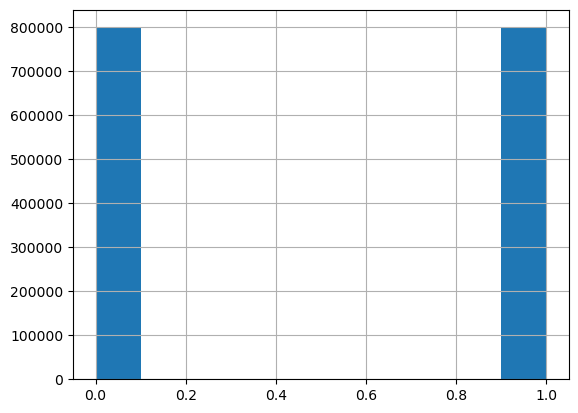

In [3]:
df['label'].hist()

In [4]:
!pip install vaderSentiment

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
analyzer.polarity_scores('Today is a good day.')

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [6]:
from sklearn.model_selection import train_test_split

X=df['text']
y=df['label']
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=.9)

In [7]:
def get_vader_score(sentence): 
    compound=analyzer.polarity_scores(sentence)['compound']
    if compound > 0.05: 
        return 1
    elif (compound >= -0.05) and (compound <=0.05): 
        return None
    else: 
        return 0
# df['vader']=df.apply(lambda x: analyzer.polarity_scores(x['text'])['compound'], axis=1)

In [8]:
result_df=pd.concat([X_test, y_test], axis=1)
result_df['vader']=result_df.apply(lambda x: get_vader_score(x['text']), axis=1)

In [9]:
result_df

,text,label,vader
1365264,@ddlovato and I loved that sentence: &quot;I a...,1,1.0
1172048,@aliasgirl18 Pushing Daisies was fab last nigh...,1,1.0
670271,So. . . Worried about bear,0,0.0
166268,@SuperWiki i want to gooo,0,1.0
1088455,????WHW??http://www.handfb.com????,1,NaN
...,...,...,...
659060,i miss my long hair...,0,0.0
723640,"@MoreLikeMelissa aw babe dont be upset, hes a...",0,1.0
940425,@tommcfly Stephenie Meyers has a guide book ex...,1,1.0
1033455,"200 push ups, 500 jumps (jump rope). Now bout ...",1,NaN


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(result_df.dropna()['label'].values, result_df.dropna()['vader'].values)

0.7172769477649724

In [11]:
print(f'Accuracy: {accuracy_score(result_df.dropna()["label"].values, result_df.dropna()["vader"].values)}')

Accuracy: 0.7172769477649724
